<a href="https://colab.research.google.com/github/NikolaZubic/AppliedGameTheoryHomeworkSolutions/blob/main/domaci1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRVI DOMAĆI ZADATAK iz predmeta "Primenjena teorija igara" (Applied Game Theory)


Implementacija softmax politike odlučivanja.

In [ ]:
# Define environment

import numpy as np
from numpy.random import rand, randint
import matplotlib.pyplot as plt
from numpy.random import choice

# bandits = [(1, 1), (5, 10), (-3, 15), (15, 2), (-24, 3)]


def environment(a, bandits):
    assert 0 <= a < len(bandits)
    mean, dev = bandits[a]
    return mean + (rand() * 2 - 1) * dev


# Decision policy

# example: q = [1, 2, 3, 4, 5]
def greedy(q):
    return np.argmax(q)


def eps_greedy(q, eps=0.1):
    if rand() < eps:
        # choose random action
        return randint(0, len(q))
    else:
        # choose greedy action
        return greedy(q)


# Learning algorithm
def learn(q, a, r, p=0.9):
    # q(a)_novo = p * q(a)_staro + (1-p)*r
    assert 0 <= a < len(q)
    q[a] = p * q[a] + (1 - p) * r
    return q.copy()


q = [1, 2, 3, 4, 5]
learn(q, 1, 102, 0.5)

# Main loop -- Learning & Acting

bandits = [(1, 1), (5, 10), (-3, 15), (15, 2), (-24, 3)]

q = [0 for b in bandits]  # initial q table = [0, 0, 0, 0, 0]

actions = []
rewards = []
qs = [q]

1. Implementacija **softmax** politike

In [ ]:
def softmax(q, temp, n_probs=len(bandits)):
    """
    Compute the softmax policy.
    :param q: current q-values
    :param temp: temperature in softmax policy, low temp = low exploration
    :param n_probs: number of probabilities computed in softmax (= number of actions = number of bandits)
    :return: action to be chosen
    """
    probs = np.zeros(n_probs)
    
    for i in range(n_probs):
      e_xi = np.exp(q[i] / temp)
      sum_xn = sum(np.exp(q_val/temp) for q_val in q)
    
      probs[i] = e_xi / sum_xn
    
    return choice(range(len(bandits)), p=probs)


Temperature value: 9; Temperature value: 8; Temperature value: 7; Temperature value: 6; Temperature value: 5; Temperature value: 4; Temperature value: 3; Temperature value: 2; Temperature value: 1; 

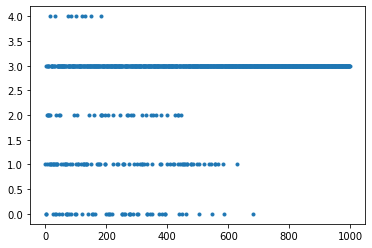

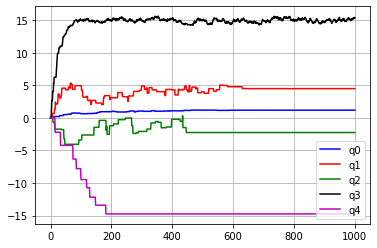

In [ ]:
temp = 10

for k in range(1000):
    if k % 100 == 0 and k < 900:
      temp -= 1
      print("Temperature value: " + str(temp), end="; ")

    # body of the main learning loop
    a = softmax(q, temp)
    r = environment(a, bandits)
    q = learn(q, a, r)
    # logging functions
    actions.append(a)
    rewards.append(r)
    qs.append(q)

# actions

plt.plot(actions, ".")  # x axis = time (0, 1000) iterations; y-axis = A = {0, 1, 2, 3, 4}
plt.show()

# Plotting

q0 = [q[0] for q in qs]
q1 = [q[1] for q in qs]
q2 = [q[2] for q in qs]
q3 = [q[3] for q in qs]
q4 = [q[4] for q in qs]

plt.plot(q0, "b", label="q0")
plt.plot(q1, "r", label="q1")
plt.plot(q2, "g", label="q2")
plt.plot(q3, "k", label="q3")
plt.plot(q4, "m", label="q4")
plt.legend()
plt.grid()
plt.show()

Zaključak: Model uspije da iskonvergira na odgovarajuće srednje vrijednosti i da fluktuira u opsegu koji propisuje standardna devijacija, ali imamo prisutnu i adekvatnu eksploraciju zato što je faktor temperature postavljen inicijalno na 10, pa je onda kroz iteracije smanjivan do 1. Naravno, opet je ipak kao najpovoljnija odabrana akcija 3, ali smo imali i biranja kod ostalih akcija.

2. U djelimično pohlepnoj politici izbora ispitati **efikasnost rješenja** u zavisnosti od izabrane vrijednosti parametra **epsilon**.

U ćeliji ispod, jasno se uočava da se povećanjem epsilona povećava eksplorativnost i samim tim biraju se više raznolike akcije. Konkretno, u primjeru dole postavili smo vrijednost epsilon = 0.9, što rezultuje velikom eksplorativnošću. Rješenje uspijeva da približno iskonvergira.

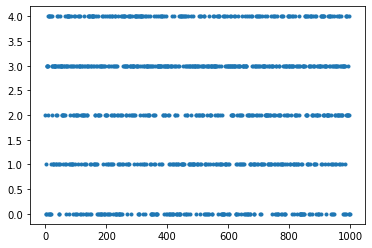

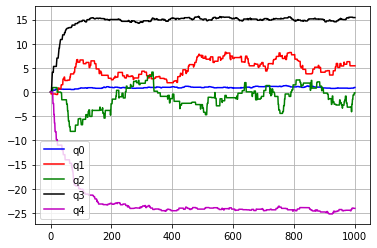

In [ ]:
bandits = [(1, 1), (5, 10), (-3, 15), (15, 2), (-24, 3)]

q = [0 for b in bandits]  # initial q table = [0, 0, 0, 0, 0]

actions = []
rewards = []
qs = [q]

temp = 1

for k in range(1000):
    # body of the main learning loop
    a = eps_greedy(q, eps=0.9)
    r = environment(a, bandits)
    q = learn(q, a, r)
    # logging functions
    actions.append(a)
    rewards.append(r)
    qs.append(q)

# actions

plt.plot(actions, ".")  # x axis = time (0, 1000) iterations; y-axis = A = {0, 1, 2, 3, 4}
plt.show()

# Plotting

q0 = [q[0] for q in qs]
q1 = [q[1] for q in qs]
q2 = [q[2] for q in qs]
q3 = [q[3] for q in qs]
q4 = [q[4] for q in qs]

plt.plot(q0, "b", label="q0")
plt.plot(q1, "r", label="q1")
plt.plot(q2, "g", label="q2")
plt.plot(q3, "k", label="q3")
plt.plot(q4, "m", label="q4")
plt.legend()
plt.grid()
plt.show()

3. U slučaju da se banditi mijenjaju tokom vremena, recimo tako što se srednje vrijednosti očekivane dobiti naglo promjene, ispitati kako se ponaša djelimično pohlepna politika odlučivanja za različite vrijednosti parametra epsilon.

U ćeliji ispod se jasno uočava da zbog velikih promjena u srednjoj vrijednosti dobijamo velike fluktuacije, te samim tim imamo i variranja u pogledu odabira akcija čak i sa epsilon=0.1, tako da u ovim slučajevima epsilon nema neki veliki uticaj.

In [ ]:
def change_bandits(bandits, sudden_change):
  """
  :param bandits: list of bandits where we will change mean value (m, std)
  :param sudden_change: list of triplets where i-th triplet corresponds to i-th bandit and we will choose
                        one number from triplet to be the new mean value of i-th bandit
  :return: updated list of bandits with changed values
    """
  bands = []
  for b in bandits:
    # take new mean value from sudden_change triple
    bands.append((choice(range(len(sudden_change))), b[1]))
  return bands

bandits = [(1, 1), (5, 10), (-3, 15), (15, 2), (-24, 3)]
sudden_change = [(-4, 5, 9), (0, 10, -3), (4, 8, -8), (25, 9, 4), (-15, -8, -3)]

bandits = change_bandits(bandits, sudden_change)
print(bandits)

[(4, 1), (1, 10), (0, 15), (0, 2), (3, 3)]


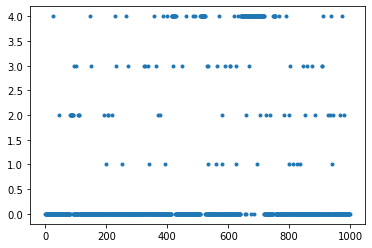

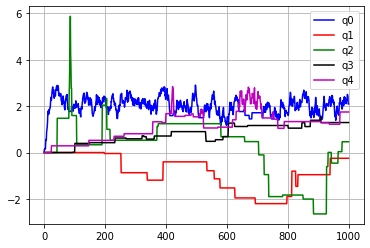

In [ ]:
bandits = [(1, 1), (5, 10), (-3, 15), (15, 2), (-24, 3)]
sudden_change = [(-4, 5, 9), (0, 10, -3), (4, 8, -8), (25, 9, 4), (-15, -8, -3)]

q = [0 for b in bandits]  # initial q table = [0, 0, 0, 0, 0]

actions = []
rewards = []
qs = [q]

for k in range(1000):
    if k > 1:
      bandits = change_bandits(bandits, sudden_change)
    # body of the main learning loop
    a = eps_greedy(q, eps=0.1)
    r = environment(a, bandits)
    q = learn(q, a, r)
    # logging functions
    actions.append(a)
    rewards.append(r)
    qs.append(q)

# actions

plt.plot(actions, ".")  # x axis = time (0, 1000) iterations; y-axis = A = {0, 1, 2, 3, 4}
plt.show()

# Plotting

q0 = [q[0] for q in qs]
q1 = [q[1] for q in qs]
q2 = [q[2] for q in qs]
q3 = [q[3] for q in qs]
q4 = [q[4] for q in qs]

plt.plot(q0, "b", label="q0")
plt.plot(q1, "r", label="q1")
plt.plot(q2, "g", label="q2")
plt.plot(q3, "k", label="q3")
plt.plot(q4, "m", label="q4")
plt.legend()
plt.grid()
plt.show()